In [4]:
pip install matplotlib numpy pandas scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 60.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

# Inshore wave data for Narrabeen Beach

Since March 2016, an archive of inshore wave information has been made available, currently spanning the fixed period of 1979-2014 from the **Narrabeen-Collaroy Beach Survey Program**.

All data can be downloaded from the Narrabeen data repository: http://narrabeen.wrl.unsw.edu.au.

In [6]:
import requests
import io
import scipy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt
from pylab import *

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Loading the dataset


The data has already been downloaded for you and consists of a `.csv` files (comma-separated values). 

This is a commonly used data format that opens easily in a range of software programs such as Notepad, Microsoft Excel, and obviously Python.


In [7]:
names = [
    "Profile",
    "date",
    "Hs",
    "Tp",
    "Dir",
    "Flag"
]
url = 'https://drive.google.com/uc?id=1V2zH5ILOBRp2PXBsHFi98NvRFJxGE4hA'
df = pd.read_csv(url, encoding="utf8", names=names, skiprows=1)

dates = pd.to_datetime(df['date'], format = '%d/%m/%Y %H:%M')

# Append a new column at the end of our iribarren values
df["time"] = dates

# Plotting significant wave height

Plot the inshore wave data, showing significant wave height...

In [8]:
def plotHsSeries(PID, start_date, end_date):
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    for k in range(len(PID)):
        ids1 = np.where(df_time.Profile==PID[k])[0]
        ax1.plot(df_time['time'].iloc[ids1],df_time['Hs'].iloc[ids1],linewidth=1,label=PID[k]) 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('$H_s$ (m)')
    ax1.legend()
    
    plt.title('Narrabeen-Collaroy Wave Height from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

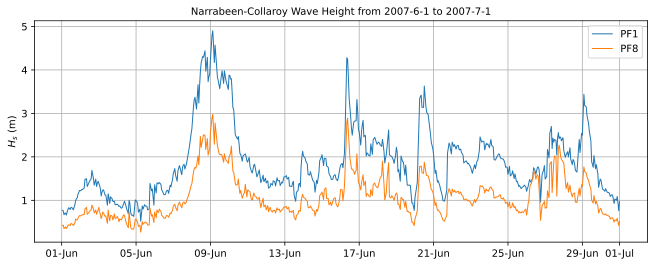

In [9]:
plotHsSeries(PID=['PF1','PF8'], start_date = '2007-6-1', end_date = '2007-7-1')

# Plotting significant wave period

Plot the inshore wave data, showing peak wave period (Tp)...

In [10]:
def plotTpSeries(PID, start_date, end_date):
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    ids1 = np.where(df_time.Profile==PID)[0]
    ax1.plot(df_time['time'].iloc[ids1],df_time['Tp'].iloc[ids1],linewidth=1,label=PID,color='k') 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('$T_p$ (s)')
    ax1.legend()
    plt.title('Narrabeen-Collaroy Wave Period from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

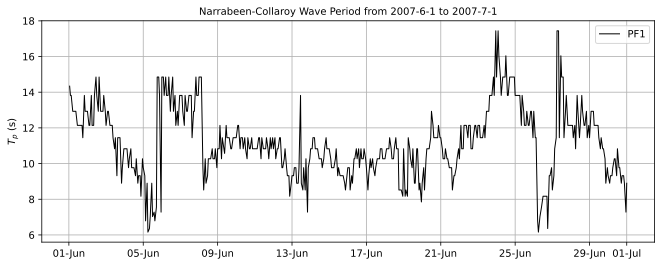

In [11]:
plotTpSeries(PID='PF1', start_date = '2007-6-1', end_date = '2007-7-1')

# Plotting wave direction

Plot the inshore wave data, showing wave direction...

In [12]:
def plotDirSeries(PID, start_date, end_date):
    
    mask = (df['time'] > start_date) & (df['time'] <= end_date)
    df_time = df.loc[mask]
    
    MyDateFormatter = DateFormatter('%d-%b')
    fig = plt.figure(figsize=(11,4), dpi=160) 
    ax1 = fig.add_subplot(111)
    
    for k in range(len(PID)):
        ids1 = np.where(df_time.Profile==PID[k])[0]
        ax1.plot(df_time['time'].iloc[ids1],df_time['Dir'].iloc[ids1],'.',label=PID[k], markersize=2) 

    locator = mdates.AutoDateLocator()
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(MyDateFormatter)
    ax1.grid(True)
    setp(gca().get_xticklabels(), rotation=0, horizontalalignment='center')
    ax1.set_ylabel('Dir ($^o$)')
    ax1.legend()
    plt.title('Narrabeen-Collaroy Wave Direction from '+str(start_date)+' to '+str(end_date),fontsize=10)
    
    return

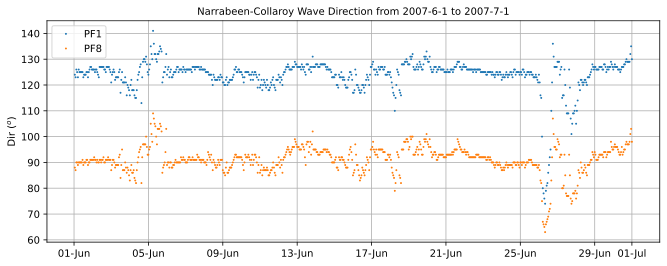

In [13]:
plotDirSeries(PID=['PF1','PF8'], start_date = '2007-6-1', end_date = '2007-7-1')

Station labels found : ['PF1' 'PF2' 'PF4' 'PF6' 'PF8']
Date span in file    : 1979-01-15 → 2014-10-15


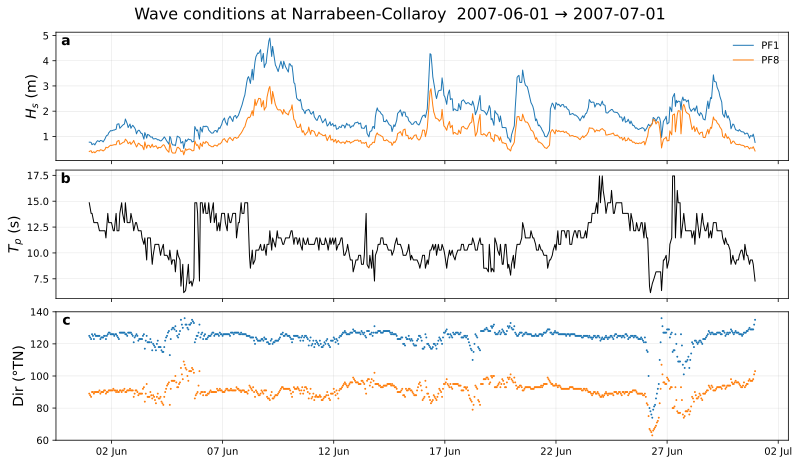

In [14]:
# ---------------------------------------------------------------
# 0.  Imports  ---------------------------------------------------
# ---------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator

# ---------------------------------------------------------------
# 1.  LOAD THE GOOGLE-DRIVE FILE (PF1 & PF8 ARE INSIDE)  ---------
# ---------------------------------------------------------------
url = "https://drive.google.com/uc?export=download&id=1V2zH5ILOBRp2PXBsHFi98NvRFJxGE4hA"

col_names = ["Profile", "date", "Hs", "Tp", "Dir", "Flag"]   # same as your snippet
df = pd.read_csv(url, names=col_names, skiprows=1, na_values=['', 'NaN'])

# --- parse the date column -------------------------------------
df["time"] = pd.to_datetime(df["date"], format="%d/%m/%Y %H:%M", errors="coerce")

# --- map numeric station codes to human-readable labels ---------
#     (If the column is already strings like 'PF1', this does nothing.)
if pd.api.types.is_numeric_dtype(df["Profile"]):
    station_map = {1: "PF1", 8: "PF8"}
    df["Profile"] = df["Profile"].map(station_map).astype(str)

print("Station labels found :", df["Profile"].unique())
print("Date span in file    :", df["time"].min().date(), "→", df["time"].max().date())

# ---------------------------------------------------------------
# 2.  PLOTTER  ---------------------------------------------------
# ---------------------------------------------------------------
def wave_overview(data, pid_list, start_date, end_date, dir_ylim=(60, 140)):
    """
    data      : DataFrame with columns ['time','Hs','Tp','Dir','Profile']
    pid_list  : e.g. ['PF1','PF8']
    start_date, end_date : 'YYYY-MM-DD'  (end exclusive)
    dir_ylim  : y-axis limits for direction panel
    """
    sdate = pd.to_datetime(start_date)
    edate = pd.to_datetime(end_date)

    mask = (
        (data["time"] >= sdate) & (data["time"] < edate) &
        (data["Profile"].isin(pid_list))
    )
    dft = data.loc[mask]

    if dft.empty:
        raise ValueError("No rows match that date range / PIDs")

    fig, axs = plt.subplots(3, 1, figsize=(11, 6), sharex=True,
                            dpi=160, constrained_layout=True)

    # (a) Hs
    for pid in pid_list:
        sel = dft[dft["Profile"] == pid]
        axs[0].plot(sel["time"], sel["Hs"], label=pid, linewidth=1)
    axs[0].set_ylabel(r"$H_s$ (m)", fontsize=14)
    axs[0].grid(True, lw=0.3, alpha=0.6)
    axs[0].legend(frameon=False)
    axs[0].text(0.02, 0.9, "a", transform=axs[0].transAxes,
                fontweight="bold", fontsize=14, ha="right")

    # (b) Tp (black line for first PID)
    sel = dft[dft["Profile"] == pid_list[0]]
    axs[1].plot(sel["time"], sel["Tp"], color="k", linewidth=1)
    axs[1].set_ylabel(r"$T_p$ (s)", fontsize=14)
    axs[1].grid(True, lw=0.3, alpha=0.6)
    axs[1].text(0.02, 0.9, "b", transform=axs[1].transAxes,
                fontweight="bold", fontsize=14, ha="right")

    # (c) Dir
    for pid in pid_list:
        sel = dft[dft["Profile"] == pid]
        axs[2].plot(sel["time"], sel["Dir"], ".", markersize=2, label=pid)
    axs[2].set_ylabel("Dir (°TN)", fontsize=14)
    axs[2].set_ylim(*dir_ylim)
    axs[2].grid(True, lw=0.3, alpha=0.6)
    axs[2].text(0.02, 0.9, "c", transform=axs[2].transAxes,
                fontweight="bold", fontsize=14, ha="right")

    # x-axis ticks
    days = (edate - sdate).days
    if days <= 40:
        locator, formatter = DayLocator(interval=5), DateFormatter("%d %b")
    else:
        locator, formatter = MonthLocator(), DateFormatter("%b")
    axs[2].xaxis.set_major_locator(locator)
    axs[2].xaxis.set_major_formatter(formatter)
    fig.autofmt_xdate(rotation=0, ha="center")

    fig.suptitle(f"Wave conditions at Narrabeen-Collaroy  {sdate.date()} → {edate.date()}",
                fontsize=16, y=1.05)           # raise it above the axes
    plt.show()





# ---------------------------------------------------------------
# 3.  DRAW JUNE 2007 WITH PF1 & PF8  ----------------------------
# ---------------------------------------------------------------
wave_overview(
    data=df,
    pid_list=["PF1", "PF8"],
    start_date="2007-06-01",
    end_date="2007-07-01",   # exclusive (plots 1 Jun – 30 Jun)
    dir_ylim=(60, 140)       # matches your reference
)


Station labels found : ['PF1' 'PF2' 'PF4' 'PF6' 'PF8']
Date span in file    : 1979-01-15 → 2014-10-15


/tmp/ipykernel_81/3335358479.py:97: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 1, 0.95])      # reserve 6 % top margin


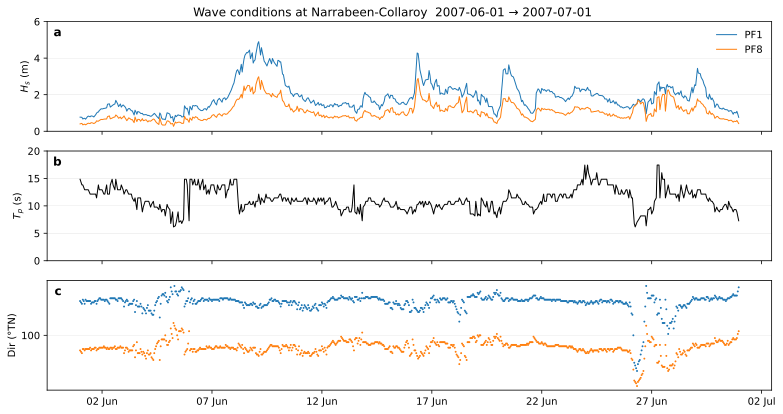

In [17]:
# ---------------------------------------------------------------
# 0.  Imports
# ---------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter, DayLocator, MonthLocator
import matplotlib.ticker as mticker        #  << new: tidy y-axes

# ---------------------------------------------------------------
# 1.  Load the Google-Drive file (PF1 & PF8 already inside)
# ---------------------------------------------------------------
url = "https://drive.google.com/uc?export=download&id=1V2zH5ILOBRp2PXBsHFi98NvRFJxGE4hA"

col_names = ["Profile", "date", "Hs", "Tp", "Dir", "Flag"]
df = pd.read_csv(url, names=col_names, skiprows=1, na_values=["", "NaN"])

df["time"] = pd.to_datetime(df["date"], format="%d/%m/%Y %H:%M", errors="coerce")

# map 1 → PF1, 8 → PF8 so the legend is human-readable
if pd.api.types.is_numeric_dtype(df["Profile"]):
    df["Profile"] = df["Profile"].map({1: "PF1", 8: "PF8"}).astype(str)

print("Station labels found :", df["Profile"].unique())
print("Date span in file    :", df["time"].min().date(), "→", df["time"].max().date())

# ---------------------------------------------------------------
# 2.  Plotting helper
# ---------------------------------------------------------------
def wave_overview(data, pid_list, start_date, end_date,
                  dir_ylim=(60, 140)):
    """
    data       DataFrame with ['time','Hs','Tp','Dir','Profile']
    pid_list   e.g. ['PF1','PF8']
    start_date, end_date  'YYYY-MM-DD'  (end exclusive)
    dir_ylim   y-axis limits for direction panel
    """
    sdate, edate = pd.to_datetime(start_date), pd.to_datetime(end_date)
    mask = ((data["time"] >= sdate) & (data["time"] < edate) &
            (data["Profile"].isin(pid_list)))
    dft = data.loc[mask]
    if dft.empty:
        raise ValueError("No rows match that date range / PIDs")

    fig, axs = plt.subplots(3, 1, figsize=(11, 6),
                            sharex=True, dpi=160,
                            constrained_layout=True)

    # helper to simplify y-axis look
    def tidy_yaxis(ax, major, ylim):
        ax.set_ylim(*ylim)
        ax.yaxis.set_major_locator(mticker.MultipleLocator(major))
        ax.yaxis.set_minor_locator(mticker.NullLocator())     # no minor ticks
        ax.tick_params(axis="both", which="both",
                       direction="out", top=False, right=False)
        ax.grid(True, axis="y", lw=0.3, alpha=0.5)            # horizontal grid
        ax.grid(False, axis="x")                              # no vertical grid

    # (a) Hs ----------------------------------------------------
    for pid in pid_list:
        sel = dft[dft["Profile"] == pid]
        axs[0].plot(sel["time"], sel["Hs"], label=pid, lw=1)
    axs[0].set_ylabel(r"$H_s$ (m)")
    tidy_yaxis(axs[0], major=2, ylim=(0, 6))
    axs[0].legend(frameon=False, loc="upper right")
    axs[0].text(0.02, 0.95, "a", transform=axs[0].transAxes,
                ha="right", va="top", fontweight="bold", fontsize=12)

    # (b) Tp ----------------------------------------------------
    sel = dft[dft["Profile"] == pid_list[0]]          # show one black line
    axs[1].plot(sel["time"], sel["Tp"], color="k", lw=1)
    axs[1].set_ylabel(r"$T_p$ (s)")
    tidy_yaxis(axs[1], major=5, ylim=(0, 20))
    axs[1].text(0.02, 0.95, "b", transform=axs[1].transAxes,
                ha="right", va="top", fontweight="bold", fontsize=12)

    # (c) Dir ---------------------------------------------------
    for pid in pid_list:
        sel = dft[dft["Profile"] == pid]
        axs[2].plot(sel["time"], sel["Dir"], ".", ms=2, label=pid)
    axs[2].set_ylabel("Dir (°TN)")
    tidy_yaxis(axs[2], major=100, ylim=dir_ylim)
    axs[2].text(0.02, 0.95, "c", transform=axs[2].transAxes,
                ha="right", va="top", fontweight="bold", fontsize=12)

    # x-axis ticks
    days = (edate - sdate).days
    if days <= 40:
        axs[2].xaxis.set_major_locator(DayLocator(interval=5))
        axs[2].xaxis.set_major_formatter(DateFormatter("%d %b"))
    else:
        axs[2].xaxis.set_major_locator(MonthLocator())
        axs[2].xaxis.set_major_formatter(DateFormatter("%b"))
    fig.autofmt_xdate(rotation=0, ha="center")

    # push title above the panels
    fig.tight_layout(rect=[0, 0, 1, 0.95])      # reserve 6 % top margin
    fig.suptitle(f"Wave conditions at Narrabeen-Collaroy  {sdate.date()} → {edate.date()}",
                fontsize=12, y=0.95)           # raise it above the axes
    plt.show()

   
    
    plt.show()

# ---------------------------------------------------------------
# 3.  Draw June 2007
# ---------------------------------------------------------------
wave_overview(
    data=df,
    pid_list=["PF1", "PF8"],           # both curves
    start_date="2007-06-01",
    end_date="2007-07-01",             # exclusive → 1 Jun – 30 Jun
    dir_ylim=(60, 140)                 # match the paper’s 60–140 °
)





/tmp/ipykernel_81/1048490174.py:55: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 1, 0.95])


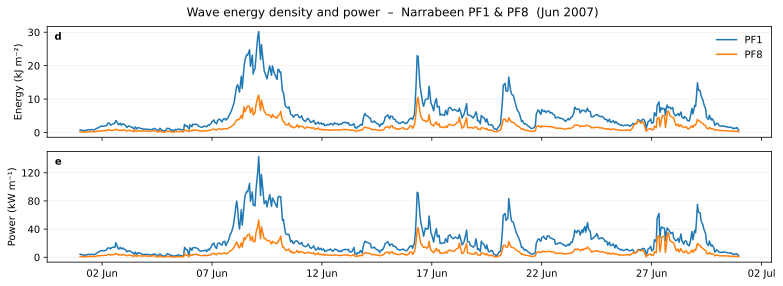

In [18]:

# -------------------------------------------------------
# 0.  (keep the DataFrame 'df' from the earlier cell)
# -------------------------------------------------------

# --- physical constants --------------------------------
rho = 1025      # kg m-3
g   = 9.81      # m s-2

# --- add Energy [J m-2] & Power [W m-1] ----------------
df["Energy"] = 0.125 * rho * g * df["Hs"]**2
df["Power"]  = (rho * g**2 * df["Hs"]**2 * df["Tp"]) / (64 * 3.1415926536)

# -------------------------------------------------------
# 1.  Slice June 2007 for both stations
# -------------------------------------------------------
mask = (
    (df["time"] >= "2007-06-01") &
    (df["time"] <  "2007-07-01") &
    (df["Profile"].isin(["PF1", "PF8"]))
)
dft = df.loc[mask]

# -------------------------------------------------------
# 2.  Plot Energy & Power
# -------------------------------------------------------
fig, ax = plt.subplots(2, 1, figsize=(11, 4), sharex=True,
                       dpi=160, constrained_layout=True)

# (a) Energy density
for pid in ["PF1", "PF8"]:
    sel = dft[dft["Profile"] == pid]
    ax[0].plot(sel["time"], sel["Energy"]/1000, label=pid)   # kJ m-2
ax[0].set_ylabel("Energy (kJ m⁻²)")
ax[0].yaxis.set_major_locator(mticker.MaxNLocator(4, integer=True))
ax[0].grid(True, axis="y", lw=0.3, alpha=0.5)
ax[0].legend(frameon=False)
ax[0].text(0.02, 0.95, "d", transform=ax[0].transAxes,
           ha="right", va="top", fontweight="bold")

# (b) Power flux
for pid in ["PF1", "PF8"]:
    sel = dft[dft["Profile"] == pid]
    ax[1].plot(sel["time"], sel["Power"]/1000, label=pid)    # kW m-1
ax[1].set_ylabel("Power (kW m⁻¹)")
ax[1].yaxis.set_major_locator(mticker.MaxNLocator(4, integer=True))
ax[1].grid(True, axis="y", lw=0.3, alpha=0.5)
ax[1].text(0.02, 0.95, "e", transform=ax[1].transAxes,
           ha="right", va="top", fontweight="bold")

# x-axis ticks every 5 days
ax[1].xaxis.set_major_locator(DayLocator(interval=5))
ax[1].xaxis.set_major_formatter(DateFormatter("%d %b"))
fig.autofmt_xdate(rotation=0, ha="center")

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle("Wave energy density and power  –  Narrabeen PF1 & PF8  (Jun 2007)",
             fontsize=12)
plt.show()
